In [3]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [4]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [5]:
dis = web.DataReader('DIS', 'yahoo', start=start, end=end)

In [6]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

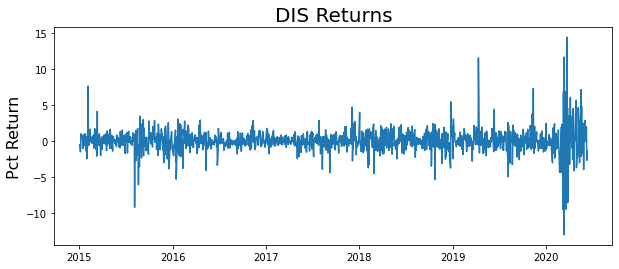

In [7]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

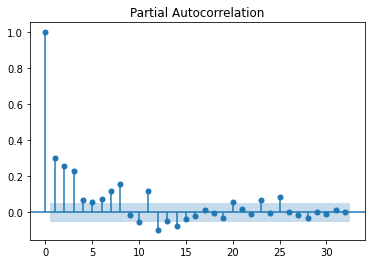

In [8]:
plot_pacf(returns**2)
plt.show()

In [9]:
model = arch_model(returns, p=3, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 45256890143.96093
Iteration:      2,   Func. Count:     22,   Neg. LLF: 984596185.9066973
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2734.718589260923
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2489.1019381949427
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2324.4207768805886
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2329.7561293995714
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2404.8368383779143
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2408.059101518685
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2300.1566168661107
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2300.1919099858505
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2300.0393772844973
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2300.028355136974
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2300.0140963853046
Iteration:     14,   Func. Count:    139,   Neg. LLF: 23

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2300.01
Distribution:                  Normal   AIC:                           4616.02
Method:            Maximum Likelihood   BIC:                           4657.80
                                        No. Observations:                 1369
Date:                Fri, Jan 29 2021   Df Residuals:                     1361
Time:                        17:28:42   Df Model:                            8
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.2793e-03  4.324e-02     -0.168      0.866 [-9.202e-02,7.746e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5400      0.189      2.856  4.291e-03    [  0.169,  0.911]
alpha[1]       0.0681  3.930e-02      1.732  8.330e-02 [-8.964e-03,  0.145]
alpha[2]       0.2033  9.898e-02      2.054  3.995e-02  [9.335e-03,  0.397]
alpha[3]       0.3173      0.151      2.097  3.597e-02  [2.077e-02,  0.614]
beta[1]    9.1758e-15      0.164  5.610e-14      1.000    [ -0.321,  0.321]
beta[2]        0.0000  9.645e-02      0.000      1.000    [ -0.189,  0.189]
beta[3]        0.2308      0.169      1.363      0.173    [ -0.101,  0.563]
===========================================================================

Covariance estimator: robust
"""

In [10]:
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3359.450640907359
Iteration:      2,   Func. Count:     16,   Neg. LLF: 39391.3514065619
Iteration:      3,   Func. Count:     24,   Neg. LLF: 233364.4056217134
Iteration:      4,   Func. Count:     31,   Neg. LLF: 321689.48057871853
Iteration:      5,   Func. Count:     38,   Neg. LLF: 25005.72123563592
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2507.039682191212
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2447.6956028449267
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2315.96634474734
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2315.3577555007887
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2315.3243897977254
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2315.259243155947
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2315.2583337038295
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2315.258310011717
Iteration:     14,   Func. Count:     95,   Neg. LLF: 2315.25

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -2315.26
Distribution:                  Normal   AIC:                           4640.52
Method:            Maximum Likelihood   BIC:                           4666.63
                                        No. Observations:                 1369
Date:                Fri, Jan 29 2021   Df Residuals:                     1364
Time:                        17:29:10   Df Model:                            5
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.5845e-03  3.985e-02      0.241      0.810 [-6.852e-02,8.769e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8614      0.138      6.237  4.449e-10    [  0.591,  1.132]
alpha[1]       0.0882  4.510e-02      1.956  5.045e-02 [-1.739e-04,  0.177]
alpha[2]       0.2627  9.127e-02      2.878  4.003e-03  [8.378e-02,  0.442]
alpha[3]       0.3556      0.169      2.103  3.550e-02  [2.412e-02,  0.687]
===========================================================================

Covariance estimator: robust
"""

In [11]:

rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [12]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])


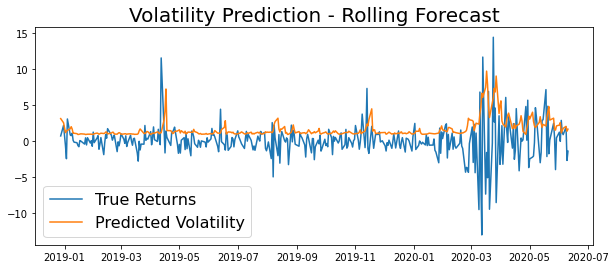

In [13]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)